## The dataset

Here I will introduce the dataset, experiment with it, tokenize it, preprocess it and save it to a new set of files. I will also write a few helper functions.

In [34]:
import codecs
import numpy as np
f1_fr = codecs.open("DATA/en-fr_paropt/dev.tok.fr", encoding='utf-8')
f2_fr = codecs.open("DATA/en-fr_paropt/train.fr", encoding='utf-8')
test_fr = codecs.open("DATA/en-fr_paropt/test.fr", encoding='utf-8')

f1_en = codecs.open("DATA/en-fr_paropt/dev.tok.en", encoding='utf-8')
f2_en = codecs.open("DATA/en-fr_paropt/train.en", encoding='utf-8')
test_en = codecs.open("DATA/en-fr_paropt/test.en", encoding='utf-8')

lang_t = 'en'
lang_s = 'fr'

raw_source_train = eval("f1_"+lang_s).read()+"\n"+eval("f2_"+lang_s).read()
raw_target_train = eval("f1_"+lang_t).read()+"\n"+eval("f2_"+lang_t).read()

raw_source_test = eval("test_"+lang_s).read()
raw_target_test = eval("test_"+lang_t).read()

print raw_source_train[0:1000]
print "Corpora aligned: {}".format(len(raw_source_train.split('\n')) == len(raw_target_train.split('\n')))

C&apos; était le 10 novembre de l&apos; année dernière alors que le technicien de scène Kevin Monk , son épouse enseignante de jardin d&apos; enfants , Roseanna , et Geneviève se préparaient à partir en voyage en famille .
Ce changement d&apos; époque est en même temps le problème de toute la démocratie chrétienne , et de ce fait , également celui d&apos; Angela Merker .
Obama ? Le premier président anti-américain . Voilà pourquoi .
Alors que les communes signalent une chute du nombre de demandes de renouvellement du permis , les autorités dans la capitale sont envahies de demandes et le nombre de demandes de renouvellement du permis est allé croissant cette semaine .
Sur l&apos; île , l&apos; utilisation d&apos; Internet est extrêmement limitée .
Le passé 4 novembre un dactyloscopiste du CTI de Cali a passé à l&apos; histoire comme la personne qui a confirmé l&apos; identité du chef suprême des Farc : &quot; Alfonso Cano &quot; , en confrontant ses empreintes digitales .
Les deux équi

# Tokenizing and preprocessing
Here we can see that sentences are not really split over lines since "Here is why ?" is technically it's own sentence - however, splitting these cases up will lead to misalignment between the english and french corpora so it's too risky. What I will do then is just tokenize each line, remove capitalisation and then replace the final punctuation with `<EOS` and unknown characters with `<UNK>` or `1`.

In [ ]:
# Fix a small pathology with the datasets, whereby spaces are put between words
# and end of sentence tokens
def format_eos(text):
    #text = text.replace(' .', '.')
    #text = text.replace('?')
    #text = text.replace('!', '.')
    #text = text.replace("idn &apos;t", 'did not')
    #text = text.replace("houldn &apos;t", 'should not')
    #text = text.replace("t &apos;s", 'it is')
    #text = text.replace('%', 'percent')
    return text

#text_fr = format_eos(text_fr)
#text_en = format_eos(text_en)
#print "still aligned:", len(raw_source.split('\n')) == len(raw_target.split('\n'))
#print raw_source[0:1000]

In [35]:

import nltk.data
import random
# First split up into lines using the Punkt tokenizer
#fr_sent_detector = nltk.data.load('tokenizers/punkt/french.pickle')
#en_sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
#fr_sents = fr_sent_detector.tokenize(text_fr)
#en_sents = en_sent_detector.tokenize(text_en)

# Split the text up into lines
# Randomise the lists but maintain parallel ordering
s = zip(raw_source_train.split('\n'), raw_target_train.split('\n'))
np.random.shuffle(s)
raw_source_train, raw_target_train = zip(*s)

print "\n".join([raw_source_train[0],raw_target_train[0]])
print "------------"
print "\n".join([raw_source_train[302],raw_target_train[302]])
print "------------\n Judging by keywords and rudimentary knowledge of French, I suspect the corpora are still aligned."
print "corpora still same length:", len(source_phrases)== len(target_phrases), '\n'

&quot; Le canot , et le guidon , et le héraut &quot; sont reçus avec mépris par les Iroquois , qui huent les émissaires , tirent des flèches sur leurs embarcations , arborent le scalp d&apos; un Algonquin allié aux Français .
The &quot; canoe , guidon and herald &quot; were received with scorn by the Iroquois , who hooted at the emissaries , waved the scalp of an Algonquin allied with the French , and shot arrows at the French boats .
------------
Il a aussi laissé entendre qu&apos; il opterait pour un assouplissement des négociations avec les Etats-Unis .
He also hinted at more flexibility in negotiations with the United States .
------------
 Judging by keywords and rudimentary knowledge of French, I suspect the corpora are still aligned.
corpora still same length: True 



In [51]:
import nltk
def tokenize_sentences(text):
    new_text = []
    flat = []
    for sentence in text:
        # This splits up tokens within a sentence
        tok_sent = (sentence.lower()).split(' ')
        flat += tok_sent
        # I'm keeping the final punctuation and appending the 
        # <EOS> tag after it
        new_text.append(tok_sent+[u'<EOS>'])
    freq = nltk.FreqDist(flat)
    return new_text, freq

tok_source_test, freq_s = tokenize_sentences(raw_source_test)
tok_target_test, freq_t = tokenize_sentences(raw_target_test)

tok_source_train, freq_s = tokenize_sentences(raw_source_train)
tok_target_train, freq_t = tokenize_sentences(raw_target_train)
print "All data tokenised. There are {} sequences for the NMT to learn from.".format(len(tok_source_train))
print tok_source_train[0:3]

All data tokenised. There are 1013625 sequences for the NMT to learn from.
[[u'&quot;', u'le', u'canot', u',', u'et', u'le', u'guidon', u',', u'et', u'le', u'h\xe9raut', u'&quot;', u'sont', u're\xe7us', u'avec', u'm\xe9pris', u'par', u'les', u'iroquois', u',', u'qui', u'huent', u'les', u'\xe9missaires', u',', u'tirent', u'des', u'fl\xe8ches', u'sur', u'leurs', u'embarcations', u',', u'arborent', u'le', u'scalp', u'd&apos;', u'un', u'algonquin', u'alli\xe9', u'aux', u'fran\xe7ais', u'.', u'<EOS>'], [u'pourtant', u',', u'les', u'scandales', u'survenus', u'dans', u'le', u'pass\xe9', u'ont', u'inqui\xe9t\xe9', u'et', u'effray\xe9', u'les', u'consommateurs', u'au', u'plus', u'haut', u'point', u'.', u'<EOS>'], [u'le', u'patrimoine', u'arm\xe9nien', u'd&apos;', u'arm\xe9nie', u'est', u'menac\xe9', u':', u'ainsi', u'dans', u'la', u'ville', u'de', u'djoulfa', u',', u'en', u'r\xe9publique', u'de', u'nakhitchevan', u',', u'qui', u'est', u'encore', u'sous', u'contr\xf4le', u'de', u'l&apos;', u'aze

In [38]:
def load_obj(name ):
    with open(name + '.pickle', 'rb') as f:
        return pickle.load(f)

def save_obj(obj, name ):
    with open(name + '.pickle', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

## Vocabularies, Sequences and Word frequencies

I need to:
- Find the frequencies of words, limiting the vocabulary size to some number of the most common words and replacing out of vocabulary words with `<UNK>`
- Give each token an ID, where `<EOS>` =1, `<UNK>` =2 and the remaining tokens are assigned numbers from 3 to vocab_size+1 at random. ID=0 is kept for padding.


In [54]:
import nltk
def word_to_ids(freq_dist, vocab_size, lang):
    total_words = len(freq_dist.keys())
    total_length = sum(freq_dist.values())
    print "{} vocab size restricts to {} percent of total vocab.".format(lang, 100*(float(vocab_size)/total_words))
    vocab = dict(freq_dist.most_common(vocab_size+1))
    covered_with_vocab = sum(vocab.values()) # Total of frequencies
    print "Percentage of whole {} corpus covered by vocab: {}".format(lang, 
                                            100*(covered_with_vocab/float(total_length)))
    # The identities begin at 3, since <EOS>=1 and <UNK>=2
    word_to_ids = dict([(word, i+3) for i, word in enumerate(vocab.keys())])
    word_to_ids[u'<UNK>'] = 2
    word_to_ids[u'<EOS>'] = 1
    word_to_ids[u'<PAD>'] = 0
    id_to_words = {}
    for word, idx in word_to_ids.items():
        id_to_words[idx] = word
    return word_to_ids, id_to_words

def replace_with_word_id(text, word_to_ids, lang):
    '''
    take the list of lists, find FreqDist, replace any
    out of vocabulary words with <UNK> whilst giving each
    token a numerical ID, return new list of lists'''
    prep_text = []
    print len(text)
    i = 0
    for sequence in text:
        ids_sent = [] # sentence with words replaced by ids
        for token in sequence:
            if token not in word_to_ids.keys():
                if token == '<EOS>':
                    ids_sent.append(1)
                else:
                    ids_sent.append(2)
            else:
                ids_sent.append(word_to_ids[token])
        prep_text.append(ids_sent)
        i+=1
        if i%10000 == 0:
            print "Sequence number {} preprocessed".format(i)
    return prep_text

vocab_size_s = 6000
vocab_size_t = 6000

#seq_data_source = seq_length_stats(tokenized_source, lang_s)
#seq_data_target = seq_length_stats(tokenized_target, lang_t)

""" For now, sequences form rows of the matrix, with the number of columns 
    equal to the maximum length of sequence (or timesteps)"""
vocab_s, id_to_word_s = word_to_ids(freq_s, vocab_size_s, lang_s)
vocab_t, id_to_word_t = word_to_ids(freq_t, vocab_size_t, lang_t)
print id_to_word_s.items()[0:20]

fr vocab size restricts to 1.66873404273 percent of total vocab.
Percentage of whole fr corpus covered by vocab: 85.7582948507
en vocab size restricts to 2.01004351744 percent of total vocab.
Percentage of whole en corpus covered by vocab: 86.3594803393
[(0, u'<PAD>'), (1, u'<EOS>'), (2, u'<UNK>'), (3, u'1,5'), (4, u'four'), (5, u'accueille'), (6, u'travaux'), (7, u'fourni'), (8, u's\xe9curit\xe9'), (9, u'devenir'), (10, u'lors'), (11, u'c\xe9l\xe9bration'), (12, u'lord'), (13, u'saskatchewan'), (14, u'touristes'), (15, u'consid\xe9rable'), (16, u'efficacement'), (17, u'fond\xe9e'), (18, u'succession'), (19, u'humeur')]


In [ ]:
source_train = replace_with_word_id(tok_source_train, id_to_word_s, lang_s)
target_train = replace_with_word_id(tok_target_train, id_to_word_t, lang_t)
# Obviously vocab preprocessing doesn't get to see the test data
source_test = replace_with_word_id(tok_source_test, id_to_word_s, lang_s)
target_test = replace_with_word_id(tok_target_test, id_to_word_t, lang_t)

#train_s, test_s = source[200::], source[0:200]
#train_t, test_t = target[200::], target[0:200]
#print "Corpora still aligned:", len(train_s) == len(train_t)


1013625
Sequence number 10000 preprocessed
Sequence number 20000 preprocessed
Sequence number 30000 preprocessed
Sequence number 40000 preprocessed
Sequence number 50000 preprocessed
Sequence number 60000 preprocessed
Sequence number 70000 preprocessed
Sequence number 80000 preprocessed
Sequence number 90000 preprocessed
Sequence number 100000 preprocessed
Sequence number 110000 preprocessed
Sequence number 120000 preprocessed
Sequence number 130000 preprocessed
Sequence number 140000 preprocessed
Sequence number 150000 preprocessed
Sequence number 160000 preprocessed
Sequence number 170000 preprocessed
Sequence number 180000 preprocessed
Sequence number 190000 preprocessed
Sequence number 200000 preprocessed
Sequence number 210000 preprocessed
Sequence number 220000 preprocessed
Sequence number 230000 preprocessed
Sequence number 240000 preprocessed
Sequence number 250000 preprocessed
Sequence number 260000 preprocessed
Sequence number 270000 preprocessed
Sequence number 280000 prepro

## Saving preprocessed objects

In [ ]:
save_obj(source_train, "source_train")
save_obj(target_train, "target_train")
save_obj(source_test, "source_test")
save_obj(target_test, "target_test")

In [7]:
def ids_to_phrases(idx_list, id_to_word):
    # Takes list of word ids and returns a string of words
    # Mainly for use in analysis
    phrase = ''
    id_dict = id_to_word
    i=0
    while idx_list[i] not in (1,0):
        phrase+= id_dict[idx_list[i]]+' '
        i+=1
    return phrase
# Test the functionality
print ids_to_phrases([234, 432, 102, 12,43,1], id_to_word_s)
print ids_to_phrases([234, 432, 102, 12,43,1], id_to_word_t)

mettre bonnes adolescents veux solution 
meat twice opportunities votes confidence 


## Evaluation metrics

I am going to use the N-gram BLEU score as my evaluation metric, changing the parameter N to see the effect it has on my model, relative to the benchmark.

## Implementing the BLEU metric
This metric will be used to test how good a prediction actually was.

In [8]:
from nltk.translate import bleu_score

def nonunique_ngrams(phrase, N):
        
        N_grams = {}
        for i in range(len(phrase)):
            li = phrase[i:i+N]
            ng = ' '.join([str(s) for s in li])
            if len(li) == N or len(phrase)<N:
                try:
                    N_grams[ng] += 1
                except KeyError:
                    N_grams[ng] = 1
        return N_grams, len(phrase)

def remove_EOS_PAD(long_phrase):
    i=0
    phrase= []
    while (long_phrase+[0])[i] not in (0,1):
        phrase.append(long_phrase[i])
        i+=1
    return phrase

def BLEU_metric(long_t_phrase, long_p_phrase, N):
    # a) Find all (non-unique) N grams in target and predicted phrase and frequencies
    # Firstly need to see how long the content is (not <EOS> or <PAD>)
    t_phrase = remove_EOS_PAD(long_t_phrase)
    p_phrase = remove_EOS_PAD(long_p_phrase)
    N = min(N, len(p_phrase), len(t_phrase))
    t_ngrams, t_len = nonunique_ngrams(t_phrase, N)
    p_ngrams, p_len = nonunique_ngrams(p_phrase, N)
    
    #print "N-gram count is {}".format(p_ngrams)
    p_num = sum(p_ngrams.values())
    
    #print p_num
    # b) How many of the N-grams in the prediction appear in the target + frequencies
    # d) Limit the number of correct counts of an Ngram to 
    #    the number of times it appears in the target
    cross_count = []
    for ng in p_ngrams.keys():
        try:
            cross_count.append(min((t_ngrams[ng], p_ngrams[ng])))
        except KeyError:
            cross_count.append(0)
    # e) return the above number divided by the total number of (non-unique) N-grams
    # I take the log of the BLEU scores so I can sum them 
    # and exponentiate to calculate the product (for geometric mean later on)
    #print float(p_num)
    return [np.log(sum(cross_count)/float(p_num)), t_len, p_len]

# Test handwritten BLEU
p_phrase1 = [4,5,4,5,4,5, 1, 0]
t_phrase = [4,5,6,34,8,76, 87, 1]
assert len(t_phrase) == len(p_phrase1)
t_phrase = remove_EOS_PAD(t_phrase)
p_phrase1 = remove_EOS_PAD(p_phrase1)

print "BLEU1 score test is {}.".format(
    bleu_score.corpus_bleu([[t_phrase]], [remove_EOS_PAD(p_phrase1)], weights=([1])))
print "BLEU2 score test is {}.".format(
    bleu_score.corpus_bleu([[t_phrase]], [remove_EOS_PAD(p_phrase1)], weights=([0.5,0.5])))


BLEU1 score test is 0.282160574964.
BLEU2 score test is 0.218560641558.


# Benchmark Model

Here I will implement the dictionary based translation benchmark using a free English-to-French dictionary [text file](http://ktranslator.sourceforge.net/dictionaries.html).


In [9]:
filename = ''
if lang_t == 'en':
    filename = "DATA/freedict-fra-eng.dic"
else:
    filename = "DATA/freedict-eng-fra.dic"

f = open(filename,'rb')
txt = unicode(f.read(), 'utf-8')

source_to_target = {}
for line in txt.split('\n'):
    words = line.split('\t')
    try:
        source, targets = words[0], words[1].split('; ')
        source_to_target[source.lower()] = (', '.join(targets).lower()).split(', ')
    except:
        pass

source_to_target.update({u'<EOS>': [u'<EOS>'], u'<PAD>': [u'<PAD>'], u'<UNK>':[u'<UNK>'], u'&quot;':[u'&quot;'], 
                 u'&apos;':[u'&apos;'], u'(':[u'('], u')':[u')'], u':':[u':'], u'%':[u'%'], u'$':[u'$']})

print source_to_target.items()[0:10]
print len(source_to_target.keys())

[(u'grossier', [u'crude', u'raw', u'rough', u'coarse', u'crude', u'harsh']), (u'bouddhisme', [u'buddhism']), (u'four', [u'furnace', u'kiln', u'oven', u'stove']), (u's\xe9curit\xe9', [u'safety', u'security']), (u'\xe0 cause de rien', [u'for no reason']), (u'yougoslavie', [u'yugoslavia']), (u'lors', [u'for', u'during', u'whereas', u'while', u'whilst', u'on the occasion of']), (u'coucou', [u'cuckoo']), (u'albumen', [u'albumen']), (u'balise', [u'buoy'])]
7673


Some words may not have direct translations in the dictionary but may be phrasal, so rather than look up words directly like `source_to_target[source_word]` I am going to find out whether the source word is contained within any of the keys in the dictionary, then use the shortest of those keys as the chosen source phrase/word. When translating the document, if a word is come across that is not in the dictionary I'll try to find a synonym, if that fails then just return `<UNK>`

In [10]:
from googletrans import Translator

def googletrans_word_by_word(s_text, s_to_t, target_lang='fr'):
    translator = Translator()
    trans_corpus = []
    skipped_phrases = []
    for i, phrase in enumerate(s_text):
        trans_phrase = []
        # Determine if the corpus is ids or words
        if type(phrase[0]) is int:
            phrase = ids_to_phrases(phrase, id_to_word_s).split(' ')
        try:
            trans_corpus.append([trans.text for 
                                 trans in translator.translate(phrase, dest=target_lang)])
        except ValueError as err:
            # Making a new Translator instance seems to help JSON errors
            translator = Translator()
            skipped_phrases.append(phrase)
            print "{} for phrase {}".format(err, i)
    return trans_corpus, skipped_phrases

BM_translated_corp, skipped_phrases = googletrans_word_by_word(test_s, source_to_target, target_lang=lang_t)
print "There are {} phrases which could not be translated first time around.".format(
                                                    len(skipped_phrases))
i=2
while len(skipped_phrases)>0:
    tc_s, skipped_phrases = googletrans_word_by_word(skipped_phrases, source_to_target, target_lang=lang_t)
    BM_translated_corp+=tc_s
    print "There are {} phrases which could not be translated in pass {}.".format(
                                                        len(skipped_phrases), i)


No JSON object could be decoded for phrase 39
No JSON object could be decoded for phrase 94
No JSON object could be decoded for phrase 151
No JSON object could be decoded for phrase 197
There are 4 phrases which could not be translated first time around.
There are 0 phrases which could not be translated in pass 2.


In [14]:
#tc = [(' '.join(phr)).split(' ') for phr in tc]
#BM_translated_corp = tc
#print "corpora probably still aligned: {}".format(len(tc) == len(test_t))
print BM_translated_corp[17]

[u'm.', u'<UNK>', u'know', u'good', u'what', u'it', u'<UNK>', u'always', u'a few', u'complaints', u'.', u'']


In [15]:
test_targets = [[ids_to_phrases(phrase,id_to_word_t)]for phrase in test_t]

BM_BLEU4 = bleu_score.corpus_bleu(test_targets, BM_translated_corp, weights=(0.25,0.25, 0.25,0.25))
BM_BLEU2 = bleu_score.corpus_bleu(test_targets, BM_translated_corp, weights=(0.5,0.5))
BM_BLEU1 = bleu_score.corpus_bleu(test_targets, BM_translated_corp, weights=([1]))

print "Actual: \n", (" ".join(test_targets[10])).encode('utf-8')
print "Prediction: \n", (" ".join(BM_translated_corp[10])).encode('utf-8')
print "Unigram BLEU score is {}.".format(BM_BLEU1)
print "Bigram BLEU score is {}.".format(BM_BLEU2)
print "4-Gram BLEU: {}".format(BM_BLEU4)

Actual: 
it &apos;s not just the <UNK> <UNK> , though , but the quality of the <UNK> and the depth . 
Prediction: 
more the problem n&apos; East not the <UNK> themselves , more good the quality from the <UNK> and the depth . 
Unigram BLEU score is 0.00277178769306.
Bigram BLEU score is 0.00934120242305.
4-Gram BLEU: 0.0171484232441


/usr/local/lib/python2.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


# Word IDs and word-to-vec vectors

Since we are interested in the process of learning weights within the RNNs to predict seq2seq mappings rather than embeddings I have chosen to use pretrained word embeddings ino order to cut down training time. [THis is](https://sites.google.com/site/rmyeid/projects/polyglot#TOC-Download-the-Embeddings) where the embeddings are from.

In [16]:


import pickle
def get_embeddings(id_to_word, lang):
    # We load pretrained word2vec embeddings from polyglot to save on training time
    filename ='DATA/polyglot-'+lang+'.pkl'
    pretrain_vocab, pretrain_embed = pickle.load(open(filename, 'rb'))
    embed_vocab = [pretrain_embed[pretrain_vocab.index('<PAD>')], pretrain_embed[pretrain_vocab.index('</S>')]]
    skip_count = 0
    skipped_words = []
    for idx, word in sorted(id_to_word.items()[2::]):
        try:
            pretrain_idx = pretrain_vocab.index(word)
            embed_vocab.append(pretrain_embed[pretrain_idx])
        except ValueError:
            try:
                # it could be that the word is a name which needs to 
                # be capitalized. Try this...
                pretrain_idx = pretrain_vocab.index(str(word.title()))
                embed_vocab.append(pretrain_embed[pretrain_idx])
            except ValueError:
                try:
                    # it could be that the word is an achronym which needs to 
                    # be upper case. Try this...
                    pretrain_idx = pretrain_vocab.index(word.upper())
                    embed_vocab.append(pretrain_embed[pretrain_idx])
                except ValueError:
                    # Give up trying to find an embedding.
                    # How many words are skipped? Which ones?
                    skip_count +=1
                    skipped_words.append(word)
                    # Let's just initialise the embedding to a random normal distribution
                    embed_vocab.append(np.random.normal(loc=0.0, scale=np.sqrt(2)/4, size=64))
    embed_vocab = np.array(embed_vocab, dtype=np.float32)
    print "The embedding matrix for {} has {} columns and {} rows.".format(lang, 
                                                embed_vocab.shape[0], embed_vocab.shape[1])
    print "{} vocab words were not in the {} embeddings file.".format(skip_count, lang)
    return embed_vocab, skipped_words
# the ith word in words corresponds to the ith embedding 

embed_vocab_s, skipped_s = get_embeddings(id_to_word_s, lang=lang_s)
embed_vocab_t, skipped_t = get_embeddings(id_to_word_t, lang=lang_t)

The embedding matrix for fr has 3002 columns and 64 rows.
201 vocab words were not in the fr embeddings file.
The embedding matrix for en has 3002 columns and 64 rows.
136 vocab words were not in the en embeddings file.


#### Note: to find a word given an index we use `id_to_word_en` and vice-versa we use `vocab_en`.

In [19]:
print vocab_t['<PAD>'], vocab_t['<EOS>'], vocab_t['<UNK>']
print skipped_t

0 1 2
[u'talysh', u'100', u'90', u'95', u'1990', u'1998', u'fatulayeva', u'400', u'isn', u'wasn', u'bitcoin', u'imbongi', u'victor-gadbois', u'13', u'12', u'esitjeni', u'vice-president', u'1973', u'&#93;', u'50', u'bitcoins', u'1995', u'spijkenisse', u'pelta', u'anti-corruption', u'high-speed', u'1', u'lerik', u'svarc', u'1956', u'wentzler', u'&#91;', u'rajchl', u'2', u'11', u'10', u'15', u'14', u'17', u'16', u'19', u'18', u'mursi', u'200', u'30,000', u'mincy', u'mccain', u'no-one', u'&apos;re', u'60', u'anto', u'500', u'unasur', u'&apos;ll', u'freudenberg', u'&apos;arenberg', u'2000', u'2001', u'5', u'mexican-americans', u'--', u'vaqueros', u'20th', u'21st', u'6', u'pattloch', u'24', u'25', u'26', u'20', u'21', u'22', u'23', u'wouldn', u'shekels', u'7', u'&apos;', u'70', u'kawah', u'19th', u'8', u'left-wing', u'&apos;d', u'&apos;m', u'&apos;t', u'&apos;s', u'mcdonald', u'long-term', u'ijen', u'34', u'9', u'garavani', u'300', u'75', u'doesn', u'&quot;', u'jedlicka', u'2006', u'2007', u

** We can see above ** that the English words which were not in the embedding files are fairly specialist words or numerical values (which are the same in French) so hopefully they won't be too much of a problem.

In [20]:
print test_s[0:7]

[[970, 118, 2, 20, 1655, 2853, 414, 2477, 1165, 294, 1697, 1310, 1032, 2395, 1978, 2, 1584, 2474, 1367, 1655, 2388, 2136, 1561, 511, 1], [1010, 1414, 1555, 2318, 2, 1596, 1281, 111, 304, 1432, 163, 1365, 414, 969, 2, 511, 1], [1844, 224, 2474, 176, 1655, 2969, 2136, 1985, 999, 2, 275, 841, 414, 1728, 2238, 511, 1], [2784, 711, 414, 2351, 224, 2361, 2, 1655, 2485, 256, 1033, 422, 1409, 972, 2, 2292, 1584, 2477, 2538, 1655, 2, 2136, 2224, 913, 511, 1], [965, 2136, 2893, 1655, 2, 2, 224, 556, 2888, 1307, 414, 2643, 2742, 1544, 2, 2, 1655, 2827, 2, 1596, 1575, 1426, 1033, 414, 1753, 1655, 698, 2424, 2361, 1089, 511, 1], [2052, 1806, 2931, 1555, 2, 224, 1169, 668, 897, 1831, 1840, 1309, 2167, 1596, 1396, 224, 2920, 224, 2386, 1033, 366, 511, 1], [1238, 2467, 1858, 2474, 918, 414, 2477, 695, 2, 2, 1432, 422, 2, 2, 414, 2, 224, 111, 1238, 1132, 2, 2172, 2361, 2036, 1655, 1451, 2736, 1024, 1189, 998, 511, 1]]


We can see a couple of things:
- The list of lists above does not have consistent lengths of rows (it's not a matrix)
- In order to process large amounts of data we need to break data up into batches of sequences

The format that I need for the seq-to-seq model is a matrix - we do this by padding shorter sequences in a batch with the `<PAD>` token (represented already as the 0th column of the embedding matrix). the of dimension `(max sequence length in batch, batch size)`, so sequences are represented as the columns of the input matrix. 

In [21]:
test_x = [[5,2,3],[2], [4,2], [1,2]]
# it's going to go from the number of cols being the sequence length/ num of rows being batch size
# to the number of rows being the max sequence length/ num cols being batch size
# Essentially like a padding and then transpose
def format_batch(x):
    seq_lengths = [len(row) for row in x]
    n_batches = len(x)
    max_seq_length = max(seq_lengths)
    outputs = np.zeros(shape=(max_seq_length, n_batches),dtype=np.int32)
    for i in range(len(seq_lengths)):
        for j in range(seq_lengths[i]):
            outputs[j][i] = x[i][j]
    return outputs

print format_batch(test_x)
print np.array(format_batch(train_t[0:7]))

[[5 2 4 1]
 [2 0 2 2]
 [3 0 0 0]]
[[ 602 1255 2269 1099  228  590 2434]
 [ 304 1566  961 2019  908    2 1894]
 [   2  590 2827 2639 2196 2438 2987]
 [2811 1056 1322  228 2569  234    2]
 [1566 2438  700 1123 1440 2207 1894]
 [3000  590 2178  323 1370 2774    2]
 [2361 1148 2994  211 1196  211    2]
 [ 550 2019  963  451 2207    2   64]
 [ 590 2226  463  590 1304 1454    2]
 [1316  211  908 2961 2634    2 2931]
 [2405    2 2611  211 1992  908    1]
 [ 590  251 1717 2634 2218 2544    0]
 [2021 2136    2  108 1890  590    0]
 [2338    2  769 1440    2    2    0]
 [ 554 2241 2269  590 2931 2438    0]
 [ 590 1482  451 1584    1    2    0]
 [1846  183    2 2438    0 2931    0]
 [2931 2587    2    2    0    1    0]
 [   1 2728  211 2222    0    0    0]
 [   0 2611    2 2438    0    0    0]
 [   0  509    2  590    0    0    0]
 [   0 1742 2817    2    0    0    0]
 [   0  554 2931 2438    0    0    0]
 [   0  590    1  590    0    0    0]
 [   0 2455    0 1306    0    0    0]
 [   0  916    0

Very cool.

# Build the network

In [22]:
import tensorflow as tf
tf.reset_default_graph()
sess = tf.InteractiveSession()
input_embedding_size = 64 # Fixed due to pretrained embedding files
encoder_hidden_units = 256
decoder_hidden_units = encoder_hidden_units # Must be the same at the moment


Now we make placeholders for the encoder inputs and decoder targets & inputs which will have the shapes:
- `encoder_inputs` int32 tensor is shaped `[encoder_max_time, batch_size]`
- `decoder_targets` int32 tensor is shaped `[decoder_max_time, batch_size]`
- `decoder_inputs` int32 tensor is shaped `[decoder_max_time, batch_size]`

In [25]:
encoder_inputs = tf.placeholder(shape=(None, None), dtype=tf.int32, name='encoder_inputs')
decoder_targets = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_targets')
decoder_inputs = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_inputs')
print encoder_inputs.shape

(?, ?)


Find the embedding vector representations each word in each sequence

In [26]:
encoder_inputs_embedded = tf.nn.embedding_lookup(embed_vocab_s, encoder_inputs)
decoder_inputs_embedded = tf.nn.embedding_lookup(embed_vocab_t, decoder_inputs)
print encoder_inputs_embedded.shape

(?, ?, 64)


We define the encoder RNN using `tf.nn.dynamics_rnn` which allows variable length sequences to fed in, `time_major=True` means that the sequences run over columns rather than rows. We use an LSTM cell to account for long-term dependencies.

In [28]:
encoder_cell = tf.contrib.rnn.LSTMCell(encoder_hidden_units)

encoder_outputs, encoder_final_state = tf.nn.dynamic_rnn(encoder_cell, encoder_inputs_embedded,
                                                         dtype=tf.float32, time_major=True)


In [29]:
encoder_final_state

LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_2:0' shape=(?, 256) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 256) dtype=float32>)

For now, we use a dynamics RNN in the decoder layer as well - however we could do with defining this manually with `raw_rnn` to allow the decoder outputs of previous timesteps to be fed in as the decoder inputs at current timesteps. The initial decoder state is set to the final encoder state, which is the magic step of the encoder-decoder architecture.

- `decoder_outputs` should have shape `[max_steps, batch_size, hidden_dim]`

In [30]:
decoder_cell = tf.contrib.rnn.LSTMCell(decoder_hidden_units)

decoder_outputs, decoder_final_state = tf.nn.dynamic_rnn(
                                decoder_cell, decoder_inputs_embedded,
                                initial_state=encoder_final_state,
                                dtype=tf.float32, time_major=True, 
                                scope="plain_decoder")
print decoder_outputs

Tensor("plain_decoder/TensorArrayStack/TensorArrayGatherV3:0", shape=(?, ?, 256), dtype=float32)


## Projection layer 
To apply the linear projection layer I need to define weights and biases, then flatten `decoder_outputs` into a vector

In [34]:
#weights
W = tf.Variable(tf.random_uniform([decoder_hidden_units, vocab_size_t], -0.5, 0.5), dtype=tf.float32)
#bias
b = tf.Variable(tf.zeros([vocab_size_t]), dtype=tf.float32)
decoder_max_steps, decoder_batch_size, decoder_dim = tf.unstack(tf.shape(decoder_outputs))
# why do we only flatten the tensor so it's rank 2?
decoder_outputs_flat = tf.reshape(decoder_outputs, (-1, decoder_dim))
#feed flattened tensor through projection
decoder_logits_flat = tf.add(tf.matmul(decoder_outputs_flat, W), b)
# make the logits the shape of the 
decoder_logits = tf.reshape(decoder_logits_flat, (decoder_max_steps, decoder_batch_size, vocab_size_t))

    print decoder_logits

Tensor("unstack_3:2", shape=(), dtype=int32)
Tensor("Reshape_7:0", shape=(?, ?, 3000), dtype=float32)


In [35]:
#decoder_logits_2 = tf.contrib.layers.linear(decoder_outputs, vocab_size_t)
#print decoder_logits_2
decoder_prediction = tf.argmax(decoder_logits, axis=2)
print decoder_prediction
#help(tf.argmax)

Tensor("ArgMax:0", shape=(?, ?), dtype=int64)
Tensor("Reshape_7:0", shape=(?, ?, 3000), dtype=float32)


## Optimisation
In order to determine whether the decoder RNN has predicted the next letter correctly, I will use a simple cross-entropy calculation which determines how strongly correlated the two vectors are. In reality the target word will be a simple one-hot encoded word vector. (?)

In [38]:
timestep_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    labels=tf.one_hot(decoder_targets, depth=vocab_size_t, dtype=tf.float32),
    logits=decoder_logits,
)
print timestep_cross_entropy
# loss is the mean of the cross entropy
loss = tf.reduce_mean(timestep_cross_entropy)
print loss
# We use AdaM which combines AdaGrad (parameters updated less often get updated more strongly)
# and momentum (updates depend on the slope of previous updates - avoiding local minima)
train_op = tf.train.AdamOptimizer().minimize(loss)


Tensor("Reshape_16:0", shape=(?, ?), dtype=float32)
Tensor("Mean_2:0", shape=(), dtype=float32)


In [203]:
sess.run(tf.global_variables_initializer())

In [204]:
# Test format_batch and make sure that the decoder
# and encoder accepts inputs with a forward pass

batch_ = [[2,124,243], [24,523,23], [9, 82]]

batch_ = format_batch(batch_)
print('batch_encoded:\n' + str(batch_))

din_ = format_batch(np.ones(shape=(3, 4), dtype=np.int32))
print('decoder inputs:\n' + str(din_))

pred_ = sess.run(decoder_prediction,
    feed_dict={
        encoder_inputs: batch_,
        decoder_inputs: din_,
    })
print('decoder predictions:\n' + str(pred_))

batch_encoded:
[[  2  24   9]
 [124 523  82]
 [243  23   0]]
decoder inputs:
[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]
decoder predictions:
[[1627 2076 1627]
 [1627 1627 1627]
 [1627 1627 1627]
 [1627 1627 1627]]


In [205]:
def batch_source_target(source, target, batch_size):
    assert len(source) == len(target)
    for start in range(0, len(source), batch_size):
        end = min(start + batch_size, len(source))
        #print type(source[start:end])
        #print len(target[start:end])
        yield source[start:end], target[start:end]     


def make_feed_dict(fd_keys, s_batch, t_batch, reverse_encoder_inputs= False):
    encoder_inputs_ = format_batch(s_batch)
    if reverse_encoder_inputs:
        encoder_inputs_ = format_batch([sequence[-2::-1]+[1] for sequence in s_batch])
    decoder_inputs_ = format_batch([[1]+sequence[0:-1] for sequence in t_batch])
    decoder_targets_ = format_batch([sequence for sequence in t_batch])
    return {
        fd_keys[0]: encoder_inputs_,
        fd_keys[1]: decoder_inputs_,
        fd_keys[2]: decoder_targets_,
    }



def make_test_feed_dict(fd_keys,s_batch, t_batch, reverse_encoder_inputs= False):
    # At testing time, we can't supervise the decoder layer with
    # the 'gold truth' example as input, so we instead feed in
    # word generated at  previous timestep. This is (apparently)
    # equivalent to feeding in zeros for the decoder inputs
    encoder_inputs_ = format_batch(s_batch)
    if reverse_encoder_inputs:
        encoder_inputs_ = format_batch([sequence[-2::-1]+[1] for sequence in s_batch])
    decoder_targets_ = format_batch([sequence for sequence in t_batch])
    decoder_inputs_ = format_batch([[0]*len(sequence) for sequence in t_batch])
    return {
        fd_keys[0]: encoder_inputs_,
        fd_keys[1]: decoder_inputs_,
        fd_keys[2]: decoder_targets_,
    }


# Test everything is working okay

batch_size = 100

for s_sample_batch, t_sample_batch in batch_source_target(train_s[0:2], train_t[0:2], batch_size):
    fd_keys = [encoder_inputs, decoder_inputs, decoder_targets]
    fd = make_feed_dict(fd_keys, s_sample_batch, t_sample_batch)
    fd_r = make_feed_dict(fd_keys, s_sample_batch, t_sample_batch, reverse_encoder_inputs= True)
    fd_t = make_test_feed_dict(fd_keys, s_sample_batch, t_sample_batch, reverse_encoder_inputs= False)
    assert len(fd.values()[0].T[0]) == len(fd_r.values()[0]) # reversed list must be the same length as original
    print fd.keys()[0]
    print np.array(fd.values()[0]).T[0]
    print "Reversed as in Sutskever et al. "
    print np.array(fd_r.values()[0]).T[0]
    assert len(fd.values()[1].T[0]) == len(fd.values()[1].T[1]) # decoder inputs and targets must be the same
    
    for i in range(len(fd.keys())-1):
        print fd.keys()[i+1]
        print np.array(fd.values()[i+1]).T[0]
    
    print "Decoder inputs at test time"
    print np.array(fd_t.values()[1]).T[0]
    break


Tensor("encoder_inputs:0", shape=(?, ?), dtype=int32)
[ 844  223  586    2 1860 2396   58 2468 1426 1657    2  113 1026 1534  414
 1010    2  812 1308    2  223  292 1699 1309  659 2478    2  512    1    0
    0    0    0    0]
Reversed as in Sutskever et al. 
[ 512    2 2478  659 1309 1699  292  223    2 1308  812    2 1010  414 1534
 1026  113    2 1657 1426 2468   58 2396 1860    2  586  223  844    1    0
    0    0    0    0]
Tensor("decoder_inputs:0", shape=(?, ?), dtype=int32)
[   1  467  211 2707 2784 2317  685  552 1688 2782 1068 2440  588    2 1098
  421 1467    2    2 1740    2  211 1784 2722  552 2911  588  643 2930    0
    0    0    0    0    0]
Tensor("decoder_targets:0", shape=(?, ?), dtype=int32)
[ 467  211 2707 2784 2317  685  552 1688 2782 1068 2440  588    2 1098  421
 1467    2    2 1740    2  211 1784 2722  552 2911  588  643 2930    1    0
    0    0    0    0    0]
Decoder inputs at test time
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# Training


In [206]:
loss_track = []

In [207]:
def format_idx(idx):
    # Just cuts out the padding of word index lists
    li = []
    for i in idx:
        if i ==0:
            break
        else:
            li.append(i)
    return li

BLEU = []
epochs = 30 # How many times we loop over the whole training data
batch_size = 92 # After how many sequences do we update the weights?
print "there will be {} samples in the final batch".format(len(train_s)%batch_size)
fd_keys = [encoder_inputs, decoder_inputs, decoder_targets]
try:
    batch_n = 0
    print "training has begun..."
    for epoch in range(epochs):    
        for s_batch, t_batch in batch_source_target(train_s, train_t, batch_size):
            feed_dict = make_feed_dict(fd_keys, s_batch, t_batch)
            _, l = sess.run([train_op, loss], feed_dict)
            
            #if batch_n == 0 or batch_n == 60:
            #    batch_n += 1
            batch_n +=1
        loss_track.append(l)
        print "epoch {}".format(epoch+1)
        print 'batch {}'.format(batch_n)
        print 'loss: {}'.format(sess.run(loss, feed_dict))
        predict_ = sess.run(decoder_prediction, feed_dict)
        #predictions = [remove_EOS_PAD(pred) for pred in predict_.T]
        #actuals = [[remove_EOS_PAD(act)] for act in fd[decoder_targets].T]
        #BLEU2 = bleu_score.corpus_bleu(actuals, predictions, weights=(0.5,0.5))
        #BLEU.append(BLEU2)
        for (inp, act, pred) in zip(feed_dict[encoder_inputs].T,
                                                 feed_dict[decoder_targets].T,
                                                 predict_.T):
            print '  sample {}:'.format(i + 1)
            print '    input     > {} \n {}'.format(format_idx(inp), ' '.join(ids_to_phrases(inp, lang=lang_s)))
            #)
            print '    actual     > {} \n {}'.format(format_idx(act), ' '.join(ids_to_phrases(act, lang=lang_s)))
            print '    predicted     > {} \n {}'.format(format_idx(pred), ' '.join(ids_to_phrases(inp, lang=lang_s)))
            
            
    print 'Training is complete'
except KeyboardInterrupt:
    print 'training interrupted'

import matplotlib.pyplot as plt

#plt.plot(, loss_track)
#l = [s for i,s in sorted(zip([len(row) for row in l], l))]

there will be 17 samples in the final batch
training has begun...
epoch 0
batch 53
loss: 2.46927428246
[[2239 2147 1699 1247 1426 1149 1547 2239  223    2    2    2  512    1
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [1860 1426  175 1770 1597 2478 1481  378  223 2831 1699  235 2206 2239
   974    2 1237  423  961 1597 2396    2 2673 2118 2800  992  767 2154
  1755  292 2888 1309 1426   30  639 2239  512    1    0    0    0    0
     0]
 [1794    2    2 1597 1272    2 1748  255 2895    1    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [1035 2915  223 2425 2475  523  223 2478 1921 2478  700 2113 2888 2736
  2540 2475  707    2 1809 2363  700  414 2375 1080  414 2480  113 2471
    23 2579  512    1    0    0    0    0    0    0    0    0    0    0
     0]
 

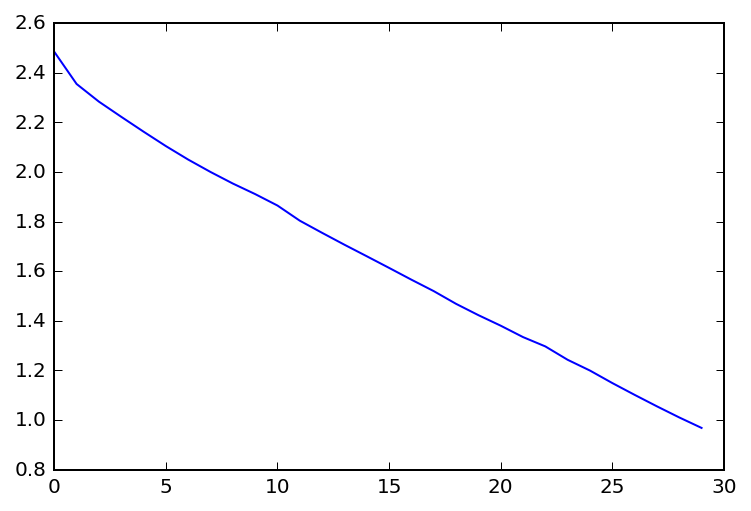

In [208]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.plot(range(len(loss_track)), loss_track)


In [245]:

predictions, actuals = [], []
batch_size = 120
fd_keys = [encoder_inputs, decoder_inputs, decoder_targets]
try:
    #batch_n = 0
    print "testing has begun..."  
    for s_batch, t_batch in batch_source_target(test_s, test_t, batch_size):
        feed_dict = make_feed_dict(fd_keys, s_batch, t_batch)
        predict_ = sess.run(decoder_prediction, feed_dict)
        for i, (inp, act, pred) in enumerate(zip(feed_dict[encoder_inputs].T,
                                                 feed_dict[decoder_targets].T,
                                                 predict_.T)):
            actuals.append([remove_EOS_PAD(act)])
            predictions.append(remove_EOS_PAD(pred))
    BLEU4 = bleu_score.corpus_bleu(actuals, predictions, weights=(0.25, 0.25, 0.25, 0.25))
    BLEU2 = bleu_score.corpus_bleu(actuals, predictions, weights=(0.5, 0.5))
    BLEU1 = bleu_score.corpus_bleu(actuals, predictions, weights=([1]))
    print'Testing is complete\nNMT Corpus BLEU4: {} \t BLEU2: {} \t BLEU1: {}\n'.format(BLEU4, BLEU2, BLEU1)
    print "Benchmark BLEU4 : {} \t BLEU2: {} \t BLEU1: {}\n".format(BM_BLEU4, BM_BLEU2, BM_BLEU1)
except KeyboardInterrupt:
    print('training interrupted')


print ids_to_phrases(actuals[8][0]+[0],id_to_word_t)
print ids_to_phrases(predictions[8]+[0],id_to_word_t)

testing has begun...
Testing is complete
NMT Corpus BLEU4: 0.0508386153591 	 BLEU2: 0.191773071831 	 BLEU1: 0.362270117695

Benchmark BLEU4 : 0.0193589553311 	 BLEU2: 0.0105182907614 	 BLEU1: 0.00310507204007

the government <UNK> an order of the senate to explain under what terms and conditions the mexican ambassador in japan signed the <UNK> trade agreement , known by its <UNK> <UNK> , according to the mexican institute of <UNK> property , and the matter has already been <UNK> . 
the <UNK> of <UNK> <UNK> to <UNK> <UNK> and <UNK> the the <UNK> of <UNK> of <UNK> government , the , to <UNK> of and , <UNK> as the <UNK> <UNK> <UNK> <UNK> to the <UNK> <UNK> , the <UNK> . <UNK> <UNK> <UNK> of been <UNK> <UNK> . 


Observations:
The above code generates a model with an increased BLEU score when it is trained on more data. Now I need to refactor the code so it is more original, efficient and generalisable.
- <del>Simplify the generator batch stuff
- not happy with tokenization: it leaves out `&apos;` etc.
- Go through and change all variable names referring to en and fr to be source and target instead
    - HAve to change the benchmark if I want to swap languages
- Make it so it's not an interactive session
- Sort phrases by length. Create batches of similar length. Randomise batches.
- Translated language stats should be similar to target. Compare percent of text covered by vocab words (i.e. is `<UNK>` being overused?)

In [164]:
"""
Decommissioned functions

def unknown_word_replacer(tokenized_text, vocab_size, lang='English'):
    ''' CURRENTLY UNUSED: This is the same as replace_with_word_id below 
    but without replacing tokens with ids.
    We take the list of lists, find FreqDist, replace any
    out of vocabulary words with <UNK>, return new list of lists'''
    flat = [item for sublist in tokenized_text for item in sublist]
    freq = nltk.FreqDist(flat)
    print "{} vocab size restricts to {} percent of total vocab.".format(lang, 100*(float(vocab_size)/len(set(flat))))
    vocab = dict(freq.most_common(vocab_size))
    text = []
    for sentence in tokenized_text:
        new_sent = []
        for token in sentence:
            if token not in vocab.keys():
                new_sent.append(u'<UNK>')
            else:
                new_sent.append(token)
        text.append(new_sent)
    return text, vocab

import random
from PyDictionary import PyDictionary
dictionary = PyDictionary()

not_in_dictionary = []
def bm_translate_word(word_list, s_to_t):
    global not_in_dictionary
    # The closer in length the candidate phrase or word is 
    # to the actual
    keys = []
    lens = []
    #assert( type(word_list) == list), "{} {}".format(type(word_list), len(word_list))
    s = random.choice(word_list)
    for k in source_to_target.keys():
        if s in k:
            keys.append(k)
            lens.append(len(k))
        else:
            pass
    
    try:
        best_key = keys[lens.index(min(lens))]
        
        translations = s_to_t[best_key]
        if type(translations) != list:
            print best_key
            print translations
        word = random.choice(translations)
        return [word]
    except Exception as err:
        #print "{} not in the dictionary".format(s)
        try:
            words = dictionary.synonym(s)
        except UnicodeEncodeError:
            return [s]
        if words:
            return words
        else:
            
            not_in_dictionary.append(s)
            return ['<UNK>']

s1 = 'children'
#print bm_translate_word(s1, en_to_fr)

def bm_translate_corpus(s_text, s_to_t):
    trans_text = []
    for phrase in s_text:
        trans_phrase = []
        phrase = ids_to_phrases(phrase, id_to_word_s).split(' ')
        for word in phrase:
            try:
                trans_attempt = bm_translate_word([word], s_to_t)
            except IndexError:
                print [word]
            while not trans_attempt:
                trans_attempt = bm_translate_word(trans_attempt, s_to_t)
            trans_phrase.append(random.choice(trans_attempt))
        trans_text.append(trans_phrase)
    return trans_text
"""

'\nDecommissioned functions\n\ndef unknown_word_replacer(tokenized_text, vocab_size, lang=\'English\'):\n    \'\'\' CURRENTLY UNUSED: This is the same as replace_with_word_id below \n    but without replacing tokens with ids.\n    We take the list of lists, find FreqDist, replace any\n    out of vocabulary words with <UNK>, return new list of lists\'\'\'\n    flat = [item for sublist in tokenized_text for item in sublist]\n    freq = nltk.FreqDist(flat)\n    print "{} vocab size restricts to {} percent of total vocab.".format(lang, 100*(float(vocab_size)/len(set(flat))))\n    vocab = dict(freq.most_common(vocab_size))\n    text = []\n    for sentence in tokenized_text:\n        new_sent = []\n        for token in sentence:\n            if token not in vocab.keys():\n                new_sent.append(u\'<UNK>\')\n            else:\n                new_sent.append(token)\n        text.append(new_sent)\n    return text, vocab\n\nimport random\nfrom PyDictionary import PyDictionary\ndictiona

In [23]:
import nltk
import matplotlib.pyplot as plt

def seq_length_stats(tokenized_text, lang):
    seq_data = dict()
    for sublist in tokenized_text:
        # Need to keep track of the longest sequence length to pad shorter ones with <EOS>
        if len(sublist) not in seq_data.keys():
            seq_data[len(sublist)] = 1
        else:
            seq_data[len(sublist)] += 1
    
    plt.scatter(seq_data.keys(), seq_data.values())
    plt.ylim(0, max(seq_data.values()))
    plt.xlim(0, max(seq_data.keys()))
    plt.xlabel("Sequence length")
    plt.ylabel("Frequency")
    titl = 'English'
    if lang == 'fr':
        titl = 'French'
    plt.title(titl)
    plt.show()
    
    return seq_data

def replace_with_word_id(tokenized_text, vocab_size, lang):
    '''
    take the list of lists, find FreqDist, replace any
    out of vocabulary words with <UNK> whilst giving each
    token a numerical ID, return new list of lists'''
    flat = []
    max_len = 0
    for sublist in tokenized_text:
        # Need to keep track of the longest sequence length to pad shorter ones with <EOS>
        if len(sublist)>max_len:
            max_len = len(sublist)
        for item in sublist:
            flat.append(item)
    freq = nltk.FreqDist(flat)
    print "{} vocab size restricts to {} percent of total vocab.".format(lang, 100*(float(vocab_size)/len(set(flat))))
    vocab = dict(freq.most_common(vocab_size+1))
    covered_with_vocab = sum(vocab.values())
    del vocab['<EOS>']
    # The identities begin at 2, since <EOS>=1 and <UNK>=2
    word_to_ids = dict([(word, i+2) for i, word in enumerate(vocab.keys())])
    text = []
    total_length = 0
    for sequence in tokenized_text:
        total_length += len(sequence)
        # Make sure sequence is no longer than the maximum allowed
        ids_sent = []
        for token in sequence:
            if token not in vocab.keys():
                if token == '<EOS>':
                    ids_sent.append(1)
                else:
                    ids_sent.append(2)
            else:
                ids_sent.append(word_to_ids[token])
        text.append(ids_sent)
    #freq.plot()
    print "Percentage of whole {} corpus covered by vocab: {}".format(lang, 
                                            100*(covered_with_vocab/float(total_length)))
    word_to_ids[u'<UNK>'] = 2
    word_to_ids[u'<EOS>'] = 1
    word_to_ids[u'<PAD>'] = 0
    id_to_words = {}
    for word, idx in word_to_ids.items():
        id_to_words[idx] = word
    return text, word_to_ids, id_to_words

vocab_size_s = 3000
vocab_size_t = 3000

#seq_data_source = seq_length_stats(tokenized_source, lang_s)
#seq_data_target = seq_length_stats(tokenized_target, lang_t)

""" For now, sequences form rows of the matrix, with the number of columns 
    equal to the maximum length of sequence (or timesteps)"""
source, vocab_s, id_to_word_s = replace_with_word_id(tokenized_source, 
                                                        vocab_size_s, lang_s)

target, vocab_t, id_to_word_t = replace_with_word_id(tokenized_target, 
                                                        vocab_size_t, lang_t)


train_s, test_s = source[200::], source[0:200]
train_t, test_t = target[200::], target[0:200]


KeyboardInterrupt: 